In [18]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph() #create a graph
N = 17

def create_graph():
    file1 = open("graph_edges.txt","r+")
    edges = file1.readlines()

    for i in range(N+1):
        if (i!=0):
            G.add_node(i) # add single node

    edge_len = len(edges)
    for i in range(edge_len):
        x = edges[i].strip().split("\t")
        G.add_edge(int(x[0])+1, int(x[1])+1)

    nx.draw(G, with_labels=True, font_weight='bold')
    plt.show()
    file1.close()

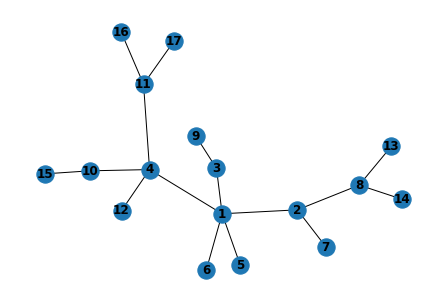

Number of Nodes Saved = 10


In [19]:
import collections
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

visited = [0] * 2 * N
descendants = [0] * 2 * N

class FireFighter:
    def __init__(self, G, follow='greedy'):
        self.G = G
        self.follow = follow
        self.setNumberDescendants(1)

    def setNumberDescendants(self, node=None):
        visited[node] = 1
        for n in G.neighbors(node):
            if (visited[n] != 1):
                self.setNumberDescendants(n)
                descendants[node] += 1 + descendants[n]

    def get_placement(self):
        if G == None:
            return 
        q = []
        q.append(1)
        res = []
        while q:
            level = []
            for _ in range(len(q)):
                node = q.pop(0)
                visited[node] = 1
                level.append(node)
                for j in G.neighbors(node):
                    if (visited[j] != 1):
                        q.append(j)
            if len(q):
                level_values = [descendants[node] for node in q]
                index = level_values.index(max(level_values))
                res.append(q[index])
                q.pop(index)
        return res

if __name__ == '__main__':
    create_graph()
    visited = [0] * 2 * N
    descendants = [0] * 2 * N
    fighter = FireFighter(G)
    visited = [0] * 2 * N
    places = fighter.get_placement()
    saved_nodes = sum([descendants[n] for n in places])+len(places)
    print("Number of Nodes Saved =",saved_nodes)
    f = open("firefightingloc.txt", "w")
    for n in places:
        f.write(str(n-1))
        f.write('\n')
    f.close()

In [20]:
G2 = nx.Graph() #create a graph
G2.add_node(1) # add single node
G2.add_node(2)
G2.add_node(3)
G2.add_node(4)
G2.add_node(5)
G2.add_nodes_from([6,7,8,9]) #add multiple nodes

In [21]:
G2.add_edge(5,8)
G2.add_edge(5,4)
G2.add_edge(5,7)
G2.add_edge(8,2)
G2.add_edge(4,3)
G2.add_edge(4,1)
G2.add_edge(7,6)
G2.add_edge(6,9)

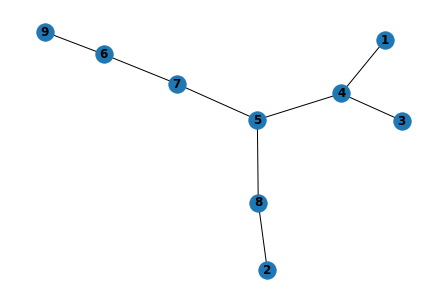

In [22]:
nx.draw(G2, with_labels=True, font_weight='bold')
plt.show()

In [23]:
list = G2.nodes
list[1]

{}

In [24]:
from networkx.algorithms.traversal.depth_first_search import dfs_tree

subtree_at_2 = dfs_tree(G, 2)

In [25]:
print(subtree_at_2)

DiGraph with 17 nodes and 16 edges


In [26]:
for n in G.neighbors(1):
    print(n)

2
3
4
5
6


In [27]:
print(nx.descendants(G, 7))

{1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}


In [28]:
visited = [0] * N

In [29]:
visited[N-5] = 1
visited[N-4]

0

In [101]:
type(collections.deque())

collections.deque

In [128]:
G.edges(data=True)

EdgeDataView([(1, 4, {}), (2, 8, {}), (3, 4, {}), (4, 5, {}), (5, 8, {}), (5, 7, {}), (6, 7, {}), (6, 9, {})])

In [130]:
from itertools import chain
set(chain.from_iterable(d.keys() for *_, d in G.edges(data=True)))

set()

In [150]:
q = collections.deque()
print(G.neighbors(1))
q.append(G.neighbors(1))
res=[]
while(q):
    level=[]
    for i in range(len(q)):
        node=q.popleft()
        level.append(node)
        for j in G.neighbors(node):
            q.append(j)
    if(level):
        res.append(level)

NetworkXError: The node <dict_keyiterator object at 0x00000162D1E66130> is not in the graph.